<a href="https://colab.research.google.com/github/anamika1302/ML_algo_from_scratch/blob/main/KNN_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the most easiest machine learning self supervised model. This model works on identifying labels based on k-nearest neighbours

###  Steps to writing this function



1.   Load Iris dataset for ease and split it into training and test datasets
2.   Define the euclidean distance and accuracy functions.
3.  Define class KNN:
    - init(): initialise no of k
    - fit():  just assign X_train and Y_train
    - predict(): loop through each value in X_test and pred label
    - __predict_label():
        - First calculate distance between each data point in X_train with the
        data point coming from X_test.
        - Second, sort the distance list and get k smallest idx
        - get  labels for each k-idx
        - use counter to calculate frequency of each level and then return most nearest label





In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
from matplotlib.colors import ListedColormap
iris = datasets.load_iris()
X,y = iris.data, iris.target
cmap = ListedColormap(["#0000FF","#00FF00", "#FF0000"])


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

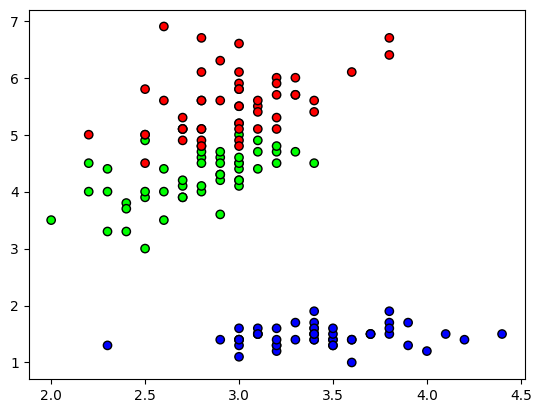

In [18]:
plt.scatter(X[:,1],X[:,2], c =y,cmap =cmap, edgecolor = "k")

In [ ]:
from collections import Counter
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))
def accuracy(y_pred, y_test):
  return np.sum(y_pred == y_test)/len(y_test)

In [77]:
class KNN:

  def __init__(self,k):
    self.k = k

  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  def predict(self, X_test):
    predicted_labels = [self._predict_label(x) for x in X_test]
    return np.array(predicted_labels)

  def _predict_label(self, x):
    distance = [euclidean_distance(x,point) for point in self.X_train]
    k_idx = np.argsort(distance)[: self.k]
    k_nearest_labels = [self.Y_train[i] for i in k_idx]
    vote = Counter(k_nearest_labels).most_common(1)
    return vote[0][0]








In [80]:
knn = KNN(k = 3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [81]:
accuracy(y_pred, Y_test)

1.0